In [11]:
import pandas as pd
import numpy as np
import tslearn
import matplotlib.pyplot as plt
#import tslearn.utils

In [12]:
data = pd.read_csv("C:\\Users\\user\\Documents\\dane_chad\\dane_165.csv") #1472

C:\Users\user\AppData\Local\Temp\ipykernel_20440\2293974226.py:1: DtypeWarning: Columns (15,16,17,19,21,24,25,26,27,28,127) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\user\\Documents\\dane_chad\\dane_165.csv")


In [13]:
data2 = pd.read_csv("C:\\Users\\user\\Documents\\dane_chad\\dane_90.csv") #6139

C:\Users\user\AppData\Local\Temp\ipykernel_20440\1207299276.py:1: DtypeWarning: Columns (15,16,17,19,21,24,25,26,27,28,127) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("C:\\Users\\user\\Documents\\dane_chad\\dane_90.csv")


In [6]:
data

,Unnamed: 0,day,state,hamd_ymrs,visit_number,patient_id,dw_mobilerecording_id,st_mobilerecording_id.x,dw_patient_id.x,st_patient_id.x,...,pcm_fftMag_mfcc_9_,pcm_fftMag_mfcc_10_,pcm_fftMag_mfcc_11_,pcm_fftMag_mfcc_12_,id,missing_mobilerecording_flag,etl_insert_date.y,etl_last_update_date.y,insert_job_id.y,update_job_id.y
0,1,2018-06-26,depression,depression,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2018-06-27,depression,depression,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2018-06-28,depression,depression,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2018-06-29,depression,depression,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2018-06-30,depression,depression,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764672,1764673,2018-11-15,mixed,depression,6,9829.0,43781.0,43781.0,165.0,159.0,...,-20.764790,17.665670,-13.596960,58.86929,89761fd5-f62e-4e6f-87a5-d9eef749b971,False,2018-12-07 19:19:45,2018-12-07 19:19:45,0.0,0.0
1764673,1764674,2018-11-15,mixed,depression,6,9829.0,43781.0,43781.0,165.0,159.0,...,-20.462840,-0.776814,0.037637,53.00073,89761fd5-f62e-4e6f-87a5-d9eef749b971,False,2018-12-07 19:19:45,2018-12-07 19:19:45,0.0,0.0
1764674,1764675,2018-11-15,mixed,depression,6,9829.0,43781.0,43781.0,165.0,159.0,...,0.696772,1.193532,-9.974019,46.98746,89761fd5-f62e-4e6f-87a5-d9eef749b971,False,2018-12-07 19:19:45,2018-12-07 19:19:45,0.0,0.0
1764675,1764676,2018-11-15,mixed,depression,6,9829.0,43781.0,43781.0,165.0,159.0,...,-3.552614,2.233069,-9.815199,44.97512,89761fd5-f62e-4e6f-87a5-d9eef749b971,False,2018-12-07 19:19:45,2018-12-07 19:19:45,0.0,0.0


In [34]:
#data['dw_mobilerecording_id'].unique()
r1 = data.loc[(data.dw_mobilerecording_id == 33908) & (data.frame_nr <= 100) & (data.chunk_number == 0),:]
r2 = data.loc[(data.dw_mobilerecording_id == 33505) & (data.frame_nr <= 100) & (data.chunk_number == 0),:]
r3 = data.loc[(data.dw_mobilerecording_id == 34091) & (data.frame_nr <= 100) & (data.chunk_number == 0),:]
r4 = data.loc[(data.dw_mobilerecording_id == 34093) & (data.frame_nr <= 100) & (data.chunk_number == 0),:]
#33005., 33224., 33505., 33802., 33908., 34091., 34093., 34090.,

In [9]:
x1 = one_call[['dw_mobilerecording_id','chunk_number','frame_nr','pcm_zcr_sma']].loc[one_call.chunk_number == 0 ,:]
x2 = two_call[['dw_mobilerecording_id','chunk_number','frame_nr','pcm_zcr_sma']].loc[two_call.chunk_number == 0 ,:]
x3 = three_call[['dw_mobilerecording_id','chunk_number','frame_nr','pcm_zcr_sma']].loc[three_call.chunk_number == 0 ,:]

X1 = x1.index.values.astype(float)
Y1 = x1.pcm_zcr_sma.astype(float)
X1= np.arange(0,len(X1),1)

X2 = x2.index.values.astype(float)
Y2 = x2.pcm_zcr_sma.astype(float)
X2= np.arange(0,len(X2),1)

X3 = x3.index.values.astype(float)
Y3 = x3.pcm_zcr_sma.astype(float)
X3= np.arange(0,len(X3),1)


C:\Users\user\AppData\Local\Temp\ipykernel_20440\1179790707.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


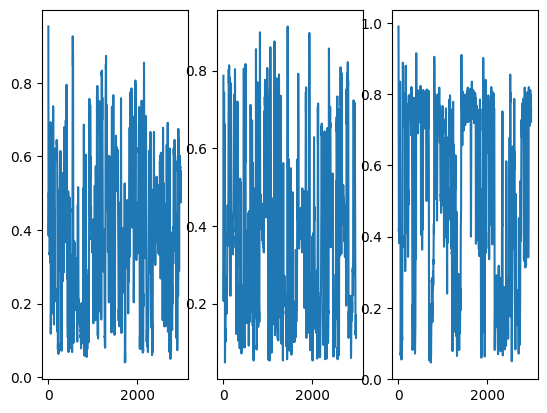

In [10]:
fig,(ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(X1,Y1)
ax2.plot(X2,Y2)
ax3.plot(X3,Y3)
fig.show()
#plt.plot(x1.index, x1['f0_sma'], type = )

In [22]:
X = to_time_series_dataset([x1, x2, x3])
y = [0, 1, 1]

In [23]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
X_scaled = TimeSeriesScalerMinMax().fit_transform(X)
print(X_scaled)

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.35570470e-04 9.10583912e-01]
  [0.00000000e+00 0.00000000e+00 6.71140940e-04 7.31751735e-01]
  ...
  [           nan            nan            nan            nan]
  [           nan            nan            nan            nan]
  [           nan            nan            nan            nan]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 8.53564519e-01]
  [0.00000000e+00 0.00000000e+00 3.34001336e-04 6.41618406e-01]
  [0.00000000e+00 0.00000000e+00 6.68002672e-04 3.69942125e-01]
  ...
  [0.00000000e+00 0.00000000e+00 9.99331997e-01 1.40655089e-01]
  [0.00000000e+00 0.00000000e+00 9.99665999e-01 1.19460524e-01]
  [0.00000000e+00 0.00000000e+00 1.00000000e+00 7.32177521e-02]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.34001336e-04 9.94699647e-01]
  [0.00000000e+00 0.00000000e+00 6.68002672e-04 9.01060106e-01]
  ...
  [0.00000000e+00 

In [24]:
from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters=3, metric="dtw",
                         max_iter=10, random_state=123)
model.fit(X_scaled)

TimeSeriesKMeans(max_iter=10, metric='dtw', random_state=123)

In [25]:
clusters = model.fit_transform(X_scaled)

In [26]:
X_scaled.shape

(3, 2995, 4)

In [27]:
import math
cluster_count = math.ceil(math.sqrt(len(X)))  #2 wychodzi

In [28]:
km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,
                          max_iter_barycenter=5,
                          random_state=0).fit(X_scaled)
km_dba.cluster_centers_.shape

(3, 2995, 4)

In [29]:
km_dba.cluster_centers_


array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 3.35570470e-04, 9.10583912e-01],
        [0.00000000e+00, 0.00000000e+00, 6.71140940e-04, 7.31751735e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 9.99328859e-01, 5.69343024e-01],
        [0.00000000e+00, 0.00000000e+00, 9.99664430e-01, 5.63868572e-01],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 5.16423356e-01]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 3.34001336e-04, 9.94699647e-01],
        [0.00000000e+00, 0.00000000e+00, 6.68002672e-04, 9.01060106e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 9.99331997e-01, 7.15547632e-01],
        [0.00000000e+00, 0.00000000e+00, 9.99665999e-01, 7.34982331e-01],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 7.59717278e-01]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.53564519e-01],
        